# Customizing Matplotlib: Configurations and Stylesheets

Las configuraciones de gráficos predeterminadas de Matplotlib suelen ser motivo de quejas entre sus usuarios.
Si bien se prevé que se produzcan muchos cambios en la versión 2.0 de Matplotlib a fines de 2016, la capacidad de personalizar las configuraciones predeterminadas ayuda a que el paquete se adapte a sus propias preferencias estéticas.

A continuación, repasaremos algunas de las opciones de configuración de tiempo de ejecución (rc) de Matplotlib y veremos la nueva función *stylesheets*, que contiene algunos conjuntos de configuraciones predeterminadas muy interesantes.

## Plot Customization by Hand

En este capítulo, hemos visto cómo es posible modificar la configuración de cada gráfico para obtener un resultado un poco más atractivo que el predeterminado.
Es posible realizar estas personalizaciones para cada gráfico individual.
Por ejemplo, aquí se muestra un histograma predeterminado bastante monótono:

In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
import numpy as np

%matplotlib inline

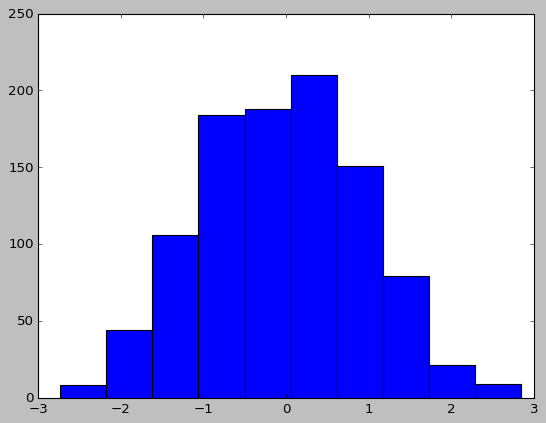

In [2]:
x = np.random.randn(1000)
plt.hist(x);

Podemos ajustar esto a mano para que sea una gráfica mucho más agradable a la vista:

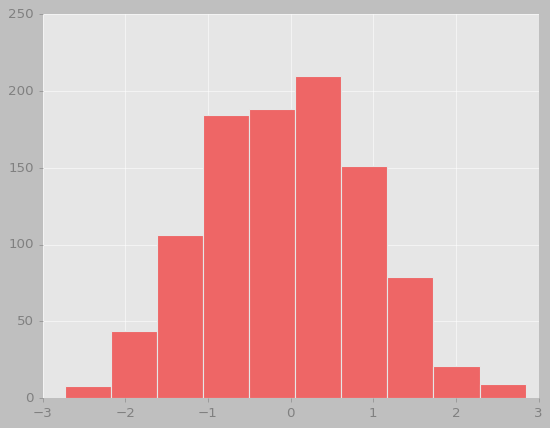

In [3]:
# usar un fondo gris claro
ax = plt.axes(facecolor='#E6E6E6')
ax.set_axisbelow(True)

# dibujar líneas de cuadrícula blancas sólidas
plt.grid(color='w', linestyle='solid')

# ocultar las espinas de los ejes
for spine in ax.spines.values():
    spine.set_visible(False)

# ocultar las marcas superiores y derechas
ax.xaxis.tick_bottom()
ax.yaxis.tick_left()

# aclarar las marcas y las etiquetas
ax.tick_params(colors='gray', direction='out')
for tick in ax.get_xticklabels():
    tick.set_color('gray')
for tick in ax.get_yticklabels():
    tick.set_color('gray')

# controlar el color de la cara y el borde del histograma
ax.hist(x, edgecolor='#E6E6E6', color='#EE6666');

Esto se ve mejor y es posible que reconozcas el aspecto inspirado en el del paquete de visualización ggplot del lenguaje R.
¡Pero esto requirió mucho esfuerzo!
Definitivamente no queremos tener que hacer todos esos ajustes cada vez que creamos un gráfico.
Afortunadamente, hay una manera de ajustar estos valores predeterminados una vez de una manera que funcione para todos los gráficos.

## Changing the Defaults: ``rcParams``

Cada vez que se carga Matplotlib, define una configuración de tiempo de ejecución (rc) que contiene los estilos predeterminados para cada elemento del gráfico que cree.
Esta configuración se puede ajustar en cualquier momento utilizando la rutina de conveniencia ``plt.rc``.
Veamos cómo se modifican los parámetros rc para que nuestro gráfico predeterminado se vea similar al que hicimos antes.

Comenzaremos guardando una copia del diccionario ``rcParams`` actual, para que podamos restablecer fácilmente estos cambios en la sesión actual:

In [4]:
IPython_default = plt.rcParams.copy()

Ahora podemos usar la función ``plt.rc`` para cambiar algunas de estas configuraciones:

In [5]:
from matplotlib import cycler
colors = cycler('color',
                ['#EE6666', '#3388BB', '#9988DD',
                 '#EECC55', '#88BB44', '#FFBBBB'])
plt.rc('axes', facecolor='#E6E6E6', edgecolor='none',
       axisbelow=True, grid=True, prop_cycle=colors)
plt.rc('grid', color='w', linestyle='solid')
plt.rc('xtick', direction='out', color='gray')
plt.rc('ytick', direction='out', color='gray')
plt.rc('patch', edgecolor='#E6E6E6')
plt.rc('lines', linewidth=2)

Con estos ajustes definidos, ahora podemos crear un gráfico y ver nuestros ajustes en acción:

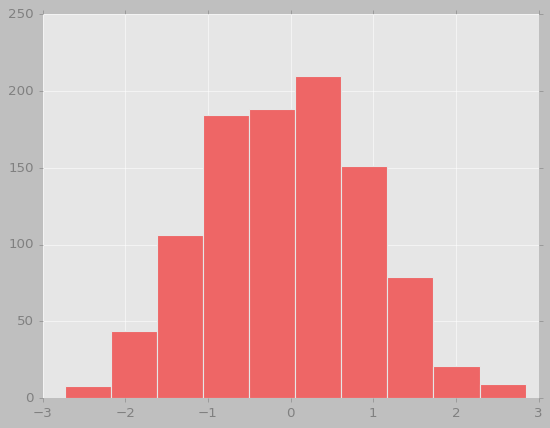

In [6]:
plt.hist(x);

Veamos cómo se ven los gráficos de líneas simples con estos parámetros rc:

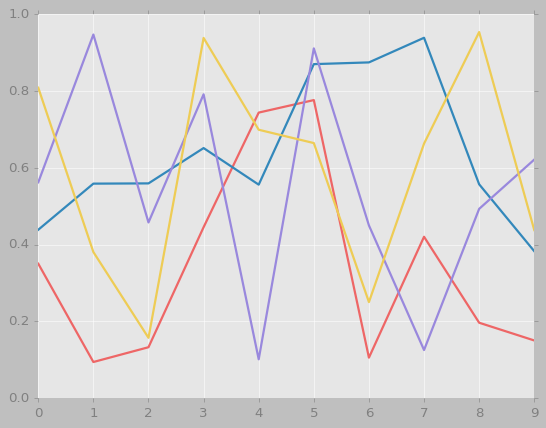

In [7]:
for i in range(4):
    plt.plot(np.random.rand(10))

Me parece mucho más agradable estéticamente que el estilo predeterminado.
Si no estás de acuerdo con mi sentido estético, la buena noticia es que puedes ajustar los parámetros rc para que se adapten a tus propios gustos.
Estos ajustes se pueden guardar en un archivo *.matplotlibrc*, sobre el que puedes leer en la [documentación de Matplotlib](http://Matplotlib.org/users/customizing.html).
Dicho esto, prefiero personalizar Matplotlib usando sus hojas de estilo.

## Stylesheets

La versión 1.4 de Matplotlib, lanzada en agosto de 2014, agregó un módulo ``style`` muy conveniente, que incluye una serie de nuevas hojas de estilo predeterminadas, así como la capacidad de crear y empaquetar sus propios estilos. Estas hojas de estilo tienen un formato similar al de los archivos *.matplotlibrc* mencionados anteriormente, pero deben tener una extensión *.mplstyle*.

Incluso si no crea su propio estilo, las hojas de estilo incluidas de manera predeterminada son extremadamente útiles.
Los estilos disponibles se enumeran en ``plt.style.available``; aquí enumeraré solo los primeros cinco para abreviar:

In [8]:
plt.style.available[:5]

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh']

La forma básica de cambiar a una hoja de estilo es llamar a

``` python
plt.style.use('stylename')
```

¡Pero tenga en cuenta que esto cambiará el estilo por el resto de la sesión!
Alternativamente, puede usar el administrador de contexto de estilo, que establece un estilo temporalmente:

``` python
with plt.style.context('stylename'):
    make_a_plot()
```

Vamos a crear una función que creará dos tipos básicos de gráficos:

In [9]:
def hist_and_lines():
    np.random.seed(0)
    fig, ax = plt.subplots(1, 2, figsize=(11, 4))
    ax[0].hist(np.random.randn(1000))
    for i in range(3):
        ax[1].plot(np.random.rand(10))
    ax[1].legend(['a', 'b', 'c'], loc='lower left')

Usaremos esto para explorar cómo se ven estos gráficos usando los distintos estilos incorporados.

### Default style

El estilo predeterminado es el que hemos visto hasta ahora en el libro; comenzaremos con él.
Primero, restablezcamos nuestra configuración de tiempo de ejecución al valor predeterminado del cuaderno:

In [10]:
# reset rcParams
plt.rcParams.update(IPython_default);

Ahora veamos cómo se ve:

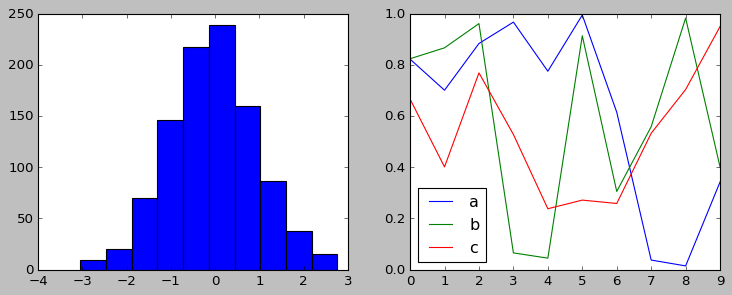

In [11]:
hist_and_lines()

### FiveThiryEight style

El estilo ``fivethirtyeight`` imita los gráficos que se encuentran en el popular [sitio web FiveThirtyEight](https://fivethirtyeight.com).
Como puede ver aquí, se caracteriza por colores llamativos, líneas gruesas y ejes transparentes:

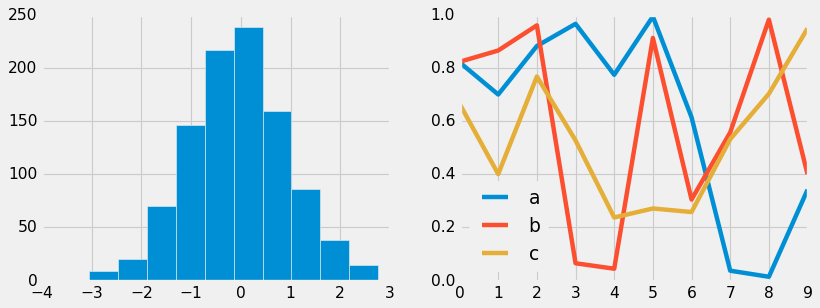

In [12]:
with plt.style.context('fivethirtyeight'):
    hist_and_lines()

### ggplot

El paquete ``ggplot`` del lenguaje R es una herramienta de visualización muy popular.
El estilo ``ggplot`` de Matplotlib imita los estilos predeterminados de ese paquete:

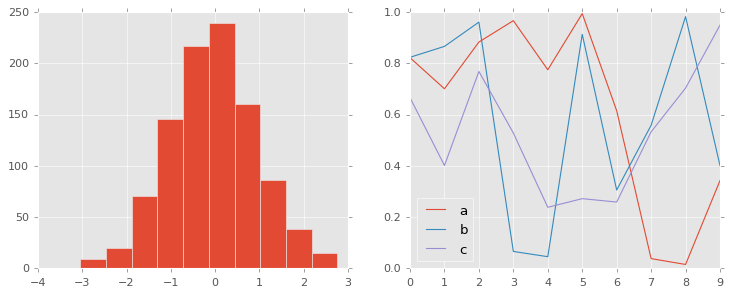

In [13]:
with plt.style.context('ggplot'):
    hist_and_lines()

### Bayesian Methods for Hackers (style)

Hay un libro en línea muy bueno y breve llamado [*Programación probabilística y métodos bayesianos para hackers*](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/); incluye figuras creadas con Matplotlib y utiliza un buen conjunto de parámetros rc para crear un estilo consistente y visualmente atractivo en todo el libro.
Este estilo se reproduce en la hoja de estilo ``bmh``:

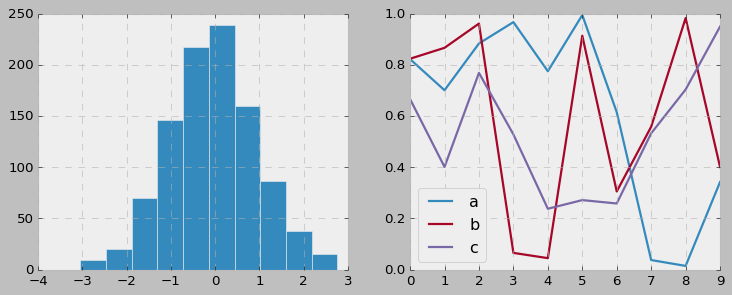

In [14]:
with plt.style.context('bmh'):
    hist_and_lines()

### Dark background

En el caso de las figuras que se utilizan en presentaciones, suele ser útil tener un fondo oscuro en lugar de uno claro.
El estilo ``dark_background`` ofrece lo siguiente:

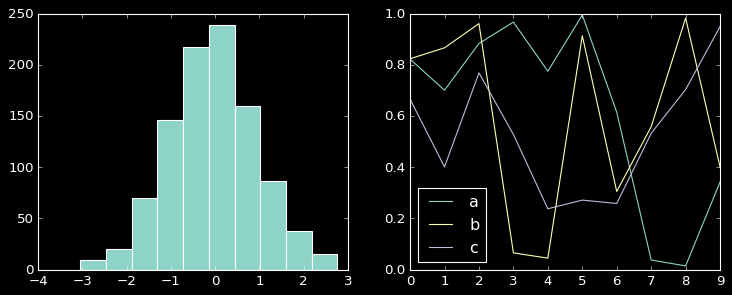

In [15]:
with plt.style.context('dark_background'):
    hist_and_lines()

### Grayscale

Es posible que en ocasiones te encuentres preparando figuras para una publicación impresa que no acepta figuras en color.
Para ello, el estilo "escala de grises", que se muestra aquí, puede resultar muy útil:

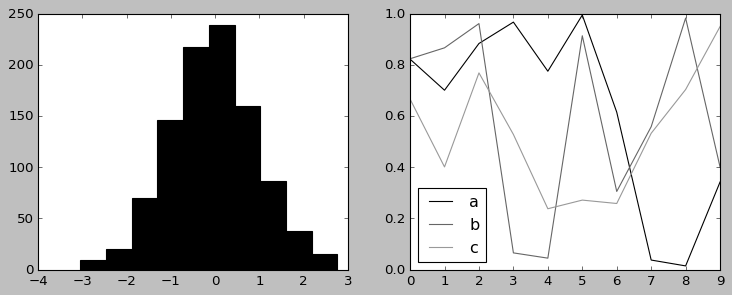

In [16]:
with plt.style.context('grayscale'):
    hist_and_lines()

### Seaborn style

Matplotlib también tiene hojas de estilo inspiradas en la biblioteca Seaborn (que se analizan con más detalle en la clase de seaborn).
Como veremos, estos estilos se cargan automáticamente cuando se importa Seaborn a un cuaderno.
He descubierto que estas configuraciones son muy útiles y suelo usarlas como predeterminadas en mi propia exploración de datos.

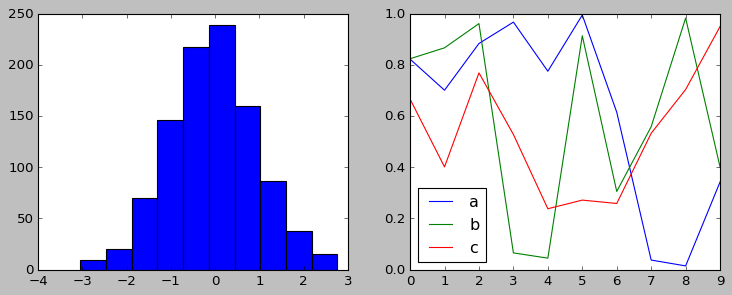

In [17]:
import seaborn # conda install seaborn -c conda-forge
hist_and_lines()

Con todas estas opciones integradas para varios estilos de gráficos, Matplotlib se vuelve mucho más útil tanto para la visualización interactiva como para la creación de figuras para publicación.
A lo largo de este libro, generalmente utilizaré una o más de estas convenciones de estilo al crear gráficos.